In [5]:
from rich import inspect
x = 10
inspect(10, methods=True)

ModuleNotFoundError: No module named 'rich'

In [ ]:
import sympy
print(sympy.__doc__)


SymPy is a Python library for symbolic mathematics. It aims to become a
full-featured computer algebra system (CAS) while keeping the code as simple
as possible in order to be comprehensible and easily extensible.  SymPy is
written entirely in Python. It depends on mpmath, and other external libraries
may be optionally for things like plotting support.

See the webpage for more information and documentation:

    https://sympy.org




In [ ]:
def earn(w,y):
    "Consumer with inital wealth w earns y"
    return w+y

def spend(w,x):
    "consumer with initial wealth w spends x"
    new_wealth = w - x
    if new_wealth < 0:
        print("Insufficient funds")
    else:
        return new_wealth

In [ ]:
class Consumer:

    def __init__(self,w):
        # initialize consumer with w dollars of wealth
        self.wealth = w

    def earn(self, y):
        # this consumer earns y dollars
        self.wealth += y

    def spend(self, x):
        # this consumer spends x dollars if feasible
        new_wealth = self.wealth-x
        if new_wealth < 0:
            print("Insufficient funds")
        else:
            self.wealth = new_wealth

## Solow growth model in OOP

Solow growth model tells us that the per capita capital stock $k_{t}$ evolves according to the rule:
$k_{t+1}= \dfrac{{szk_{t}^{\alpha}+(1-\delta)k_{t}}}{1+n}$. Here,
- $s$ is an exogenously given savings rate
- $z$ is a productivity parameter
- $\alpha$ is capital's share of income
- $n$ is the population growth rate
- $\delta$ is the depreciation rate

A **steady state** is a $k$ that solves the equation, such that $k_{t+1}=k_{t}=k$

In [ ]:
class Solow:
    def __init__(self, n = 0.05, # pop growth rate
                       s = 0.25, # savings rate
                       δ = 0.1, # dep rate
                       α = 0.3, # share of labor
                       z = 2.0, # productivity
                       k = 1.0 # current capital stock
                       ):
        self.n, self.s, self.δ, self.α, self.z = n,s,δ,α,z
        self.k = k
    
    def fn(self):
        n,s,δ,α,z = self.n, self.s, self.δ, self.α, self.z # unpack parameters
        evalfn = (s*z*self.k**α + (1-δ)*self.k)/(1+n)
        return evalfn
    
    def update(self):
        self.k = self.fn() # updates the current capital stock k

    def steady_state(self):
        n,s,δ,α,z = self.n, self.s, self.δ, self.α, self.z
        # set k(t+1) = k(t) = k and then isolate k to get the below eq
        evalss = ((s*z)/(n+δ))**(1/(1-α))
        return evalss
    
    def gen_sequence(self,t):
        # generates and returns a time series of length t
        path = []
        for i in range(t):
            path.append(self.k)
            self.update() # gets the new val of k for the next iter
        return path
    

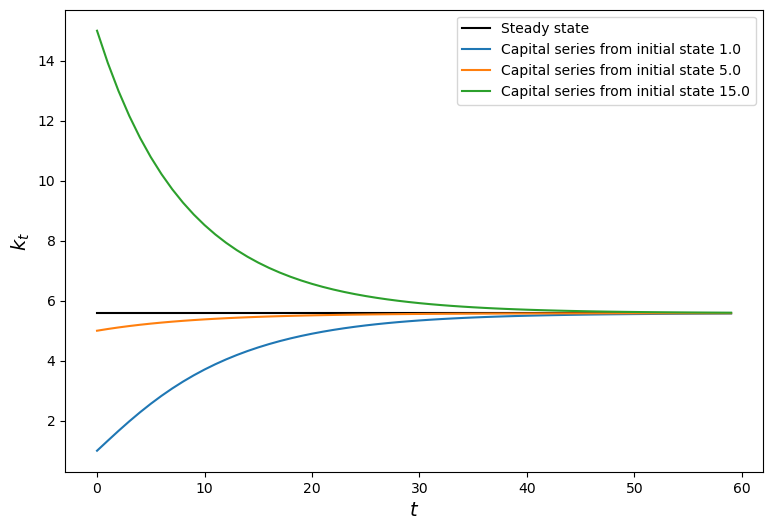

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

s1 = Solow()
s2 = Solow(k=5.0)
s3 = Solow(k=15.0)

T = 60
fig, ax = plt.subplots(figsize=(9,6))

ax.plot([s1.steady_state()]*T, 'k-', label = 'Steady state')

for s in s1, s2, s3:
    lb = f"Capital series from initial state {s.k}"
    ax.plot(s.gen_sequence(T), label = lb)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

## A competitive market

Suppose we have a market where both buyers and sellers are price takers, given by:<br>
Linear demand curve: $Q=a_{d}-b_{d}p$<br>
Linear supply curve: $Q=a_{z}+b_{z}(p-t)$, where $t$ is the per unit tax

We will compute:<br>
i) Equilibrium price<br>
ii) Equilibrium quantity<br>
iii) Consumer surplus<br>
iv) Producer surplus<br>
v) Tax revenue<br>
vi) Inverse demand curve <br>
vii) Inverse supply curve<br>
viii) Inverse supply curve without tax <br>

In [1]:
class Market:
    def __init__(self, ad, bd, az, bz, tax):
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        # ad and az are the y intercepts of the demand and supply curve
        # since the d curve slopes downward and s curve slopes upwards, if yint(demand) < yint(supply), the two curves will never intersect
        # therefore we must avoid a case where ad < az
        if ad < az:
            raise ValueError("Insufficient demand")
        
    def price(self):
        ad, bd, az, bz, tax = self.ad, self.bd, self.az, self.bz, self.tax
        eqprice = (ad - az + (bz*tax))/(bz+bd)
        return eqprice
    
    def quantity(self):
        eqqty = self.ad - (self.bd * self.price())
        return eqqty
    
    # calculating cs and ps geometrically without integration since its linear
    def consumer_surplus(self):
        cs = (0.5 * self.quantity()) * ((self.ad/self.bd) - self.price())
        return cs
    
    def producer_surplus(self):
        ps = (0.5 * self.quantity()) * (self.price() - ((self.bz*self.tax - self.az)/self.bz))
        return ps
    
    def tax_revenue(self):
        taxrev = self.tax * self.quantity()
        return taxrev
    
    def inverse_dcurve(self, q):
        inv_dcurve = (self.ad - q)/(self.bd)
        return inv_dcurve
    
    def inverse_scurve(self, q):
        inv_scurve = (q-self.az+(self.bz*self.tax))/(self.bz)
        return inv_scurve
    
    def inverse_scurve_notax(self,q):
        inv_scurve_notax = (q-self.az)/self.bz
        return inv_scurve_notax

In [2]:
m = Market(15, .5, -2, .5, 3)
print(f"Equilibrium price = {m.price()}")
print(f"Consumer surplus = {m.consumer_surplus()}")

Equilibrium price = 18.5
Consumer surplus = 33.0625


### Plot the following
Inverse demand curve, inverse supply curve, inverse supply curve without taxes

Equilirium quantity = 5.75
Equilibrium price = 18.5


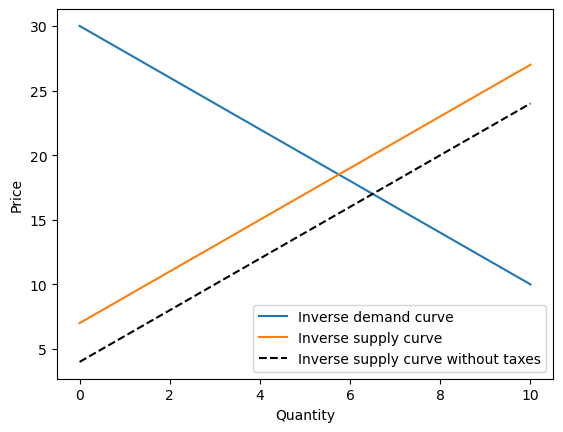

In [3]:
import numpy as np
import matplotlib.pyplot as plt

q = np.linspace(0.0,10,100)

inv_dcurve = m.inverse_dcurve(q)
inv_scurve = m.inverse_scurve(q)
inv_scurve_notax = m.inverse_scurve_notax(q)

print(f"Equilirium quantity = {m.quantity()}")
print(f"Equilibrium price = {m.price()}")

# syntax is plt.plot(x,y) for x axis and y axis
plt.plot(q, inv_dcurve, label = "Inverse demand curve")
plt.plot(q, inv_scurve, label = "Inverse supply curve")
plt.plot(q, inv_scurve_notax, '--k', label = "Inverse supply curve without taxes")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend()
plt.show()

In [4]:
def dwl(m):
    no_tax_m = Market(m.ad, m.bd, m.az, m.bz, 0) # same market as m but without taxes
    no_tax_surplus = no_tax_m.consumer_surplus() + no_tax_m.producer_surplus()
    with_tax_surplus = m.consumer_surplus() + m.producer_surplus() + m.tax_revenue()
    dwl = no_tax_surplus - with_tax_surplus
    #print(f"The surplus with tax is {with_tax_surplus}, while the surplus in the same economy without taxes would be {no_tax_surplus}")
    #print(f"The deadweight loss due to the tax is {dwl}.")
    return dwl

dwl(m)

1.125

# Exercise 8.1

The **empirical cumulative distribution function (ecdf)** corresponding to a sample $\{X_{i}\}_{i=1}^n$ is defined as<br>
$F_{n}(x):= \dfrac{1}{n}\sum\limits_{i=1}^{n}{1\{X_{i}\leq x\}}, (x\in \mathbb{R})$<br>
Here, $1\{X_{i}\leq n\}$ is an indicator function (one if $X_{i}\leq x$ and zero otherwise), and hence $F_{n}(x)$ is the fraction of the sample that falls below $x$.

The Glivenko-Cantelli Theorem states that, provided the sample is IID, the ecdf $F_{n}$ converges to the true distribution function $F$. 

Implement $F_{n}$ as a class called `ECDF`, where:
- A given sample $\{X_{i}\}_{i=1}^{n}$ are the instance data, stored as `self.observations`.
- The class implements a `__call__` method that returns $F_{n}(x)$ for any $x$.

Your code should work as follows (modulo randomness)
~~~python
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)  # Evaluate ecdf at x = 0.5
~~~
~~~python
F.observations = [uniform(0, 1) for i in range(1000)]
F(0.5)
~~~

Aim for clarity, not efficiency.

In [7]:
import random

class ECDF:
    def __init__(self, observations):
        self.observations = observations
        return None
        
    def __call__(self, x):
        counter = 0
        for i in self.observations:
            if i <= x:
                counter += 1

        n = len(self.observations)
        ecdf = counter / n
        return ecdf       

observations = [random.uniform(0,100) for i in range(2000)]

F = ECDF(observations)
print(F(90))    

0.899
